# 1️⃣ Part 1 (Python) - Dinosaur data 🦕

## 📖 Background
You're applying for a summer internship at a national museum for natural history. The museum recently created a database containing all dinosaur records of past field campaigns. Your job is to dive into the fossil records to find some interesting insights, and advise the museum on the quality of the data. 

## 💾 The data

You have access to a real dataset containing dinosaur records from the Paleobiology Database ([source](https://paleobiodb.org/#/)):


| Column name | Description |
|---|---|
| occurence_no | The original occurrence number from the Paleobiology Database. |
| name | The accepted name of the dinosaur (usually the genus name, or the name of the footprint/egg fossil). |
| diet | The main diet (omnivorous, carnivorous, herbivorous). |
| type | The dinosaur type (small theropod, large theropod, sauropod, ornithopod, ceratopsian, armored dinosaur). |
| length_m | The maximum length, from head to tail, in meters. |
| max_ma | The age in which the first fossil records of the dinosaur where found, in million years. |
| min_ma | The age in which the last fossil records of the dinosaur where found, in million years. |
| region | The current region where the fossil record was found. |
| lng | The longitude where the fossil record was found. |
| lat | The latitude where the fossil record was found. |
| class | The taxonomical class of the dinosaur (Saurischia or Ornithischia). |
| family | The taxonomical family of the dinosaur (if known). |

The data was enriched with data from Wikipedia.

## 💪 Objectives

The aim is to gain insights into the diversity, size, and distribution of dinosaur species recorded in the fossil dataset. Specifically, the following questions must be answered:

- How many unique dinosaur names are recorded in the dataset?
- Which dinosaur species is the largest, and what are the patterns of missing data within the dataset?
- Which dinosaur type is most frequently recorded in the dataset?
- Is there a trend of dinosaurs increasing in size over time, and what is the relationship between their age and length?
- How can an interactive map be utilized to visualize the geographic locations of the dinosaur fossils?
- What additional insights can be derived from the data through detailed analysis?

## 🔑 Summary of Findings

- There are 1042 unique dinosaur names present in the dataset. This indicates a rich diversity of dinosaur species recorded in the database.
- The largest dinosaur in the dataset is the Supersaurus, with a length of 35 meters. This sauropod dinosaur is herbivorous and was found in Colorado.
- The dinosaur type with the most occurrences is the ornithopod, followed by large theropods and small theropods. Armored dinosaurs have the least occurrences.
- The dinosaur type with the most occurrences is the ornithopod, followed by large theropods and small theropods. Armored dinosaurs have the least occurrences.
- There is a slight positive correlation between the age (in millions of years ago) and dinosaur length, suggesting a marginal trend of increasing size over time. However, the high variability indicates that this trend is not strong, and other factors likely influenced dinosaur size as well.

In [6]:
# Import the pandas and numpy packages
import pandas as pd
import numpy as np
# Load the data
dinosaurs = pd.read_csv('data/dinosaurs.csv')

In [7]:
# Preview the dataframe
dinosaurs

occurrence_no               name  ...         class             family
0            130294  Protarchaeopteryx  ...    Saurischia  Archaeopterygidae
1            130295        Caudipteryx  ...    Saurischia    Caudipterygidae
2            139242        Gorgosaurus  ...    Saurischia    Tyrannosauridae
3            139250        Gorgosaurus  ...    Saurischia    Tyrannosauridae
4            139252        Gorgosaurus  ...    Saurischia    Tyrannosauridae
...             ...                ...  ...           ...                ...
4946        1360627      Isaberrysaura  ...  Ornithischia                NaN
4947        1363632        Stegosaurus  ...  Ornithischia      Stegosauridae
4948        1363633     Othnielosaurus  ...  Ornithischia                NaN
4949        1364695          Iguanodon  ...  Ornithischia                NaN
4950        1365108         Luluichnus  ...  Ornithischia                NaN

[4951 rows x 12 columns]

### ❔How many different dinosaur names are present in the data?

In [8]:
unique_dinosaur_names = dinosaurs['name'].nunique()
unique_dinosaur_names

1042

There are 1042 unique dinosaur names in the dataset. This indicates a high level of species diversity, providing a broad base for studying different dinosaur groups. 

### **❔Which was the largest dinosaur? What about missing data in the dataset?**

In [9]:
largest_dinosaur = dinosaurs.loc[dinosaurs['length_m'].idxmax()]
largest_dinosaur

occurrence_no          465134
name              Supersaurus
diet              herbivorous
type                 sauropod
length_m                 35.0
max_ma                  155.7
min_ma                  145.0
region               Colorado
lng               -108.397202
lat                 38.583099
class              Saurischia
family           Diplodocidae
Name: 570, dtype: object

In [10]:
missing_data = dinosaurs.isnull().sum()
largest_dinosaur, missing_data

(occurrence_no          465134
 name              Supersaurus
 diet              herbivorous
 type                 sauropod
 length_m                 35.0
 max_ma                  155.7
 min_ma                  145.0
 region               Colorado
 lng               -108.397202
 lat                 38.583099
 class              Saurischia
 family           Diplodocidae
 Name: 570, dtype: object,
 occurrence_no       0
 name                0
 diet             1355
 type             1355
 length_m         1383
 max_ma              0
 min_ma              0
 region             42
 lng                 0
 lat                 0
 class               0
 family           1457
 dtype: int64)

The largest dinosaur in the dataset is the Supersaurus, which measures 35 meters in length. 

The dataset has significant missing data in several columns, notably 'diet', 'type', 'length_m', and 'family'. This missing data needs to be addressed to ensure accurate analysis and conclusions.

### **❔What dinosaur type has the most occurrences in this dataset?**

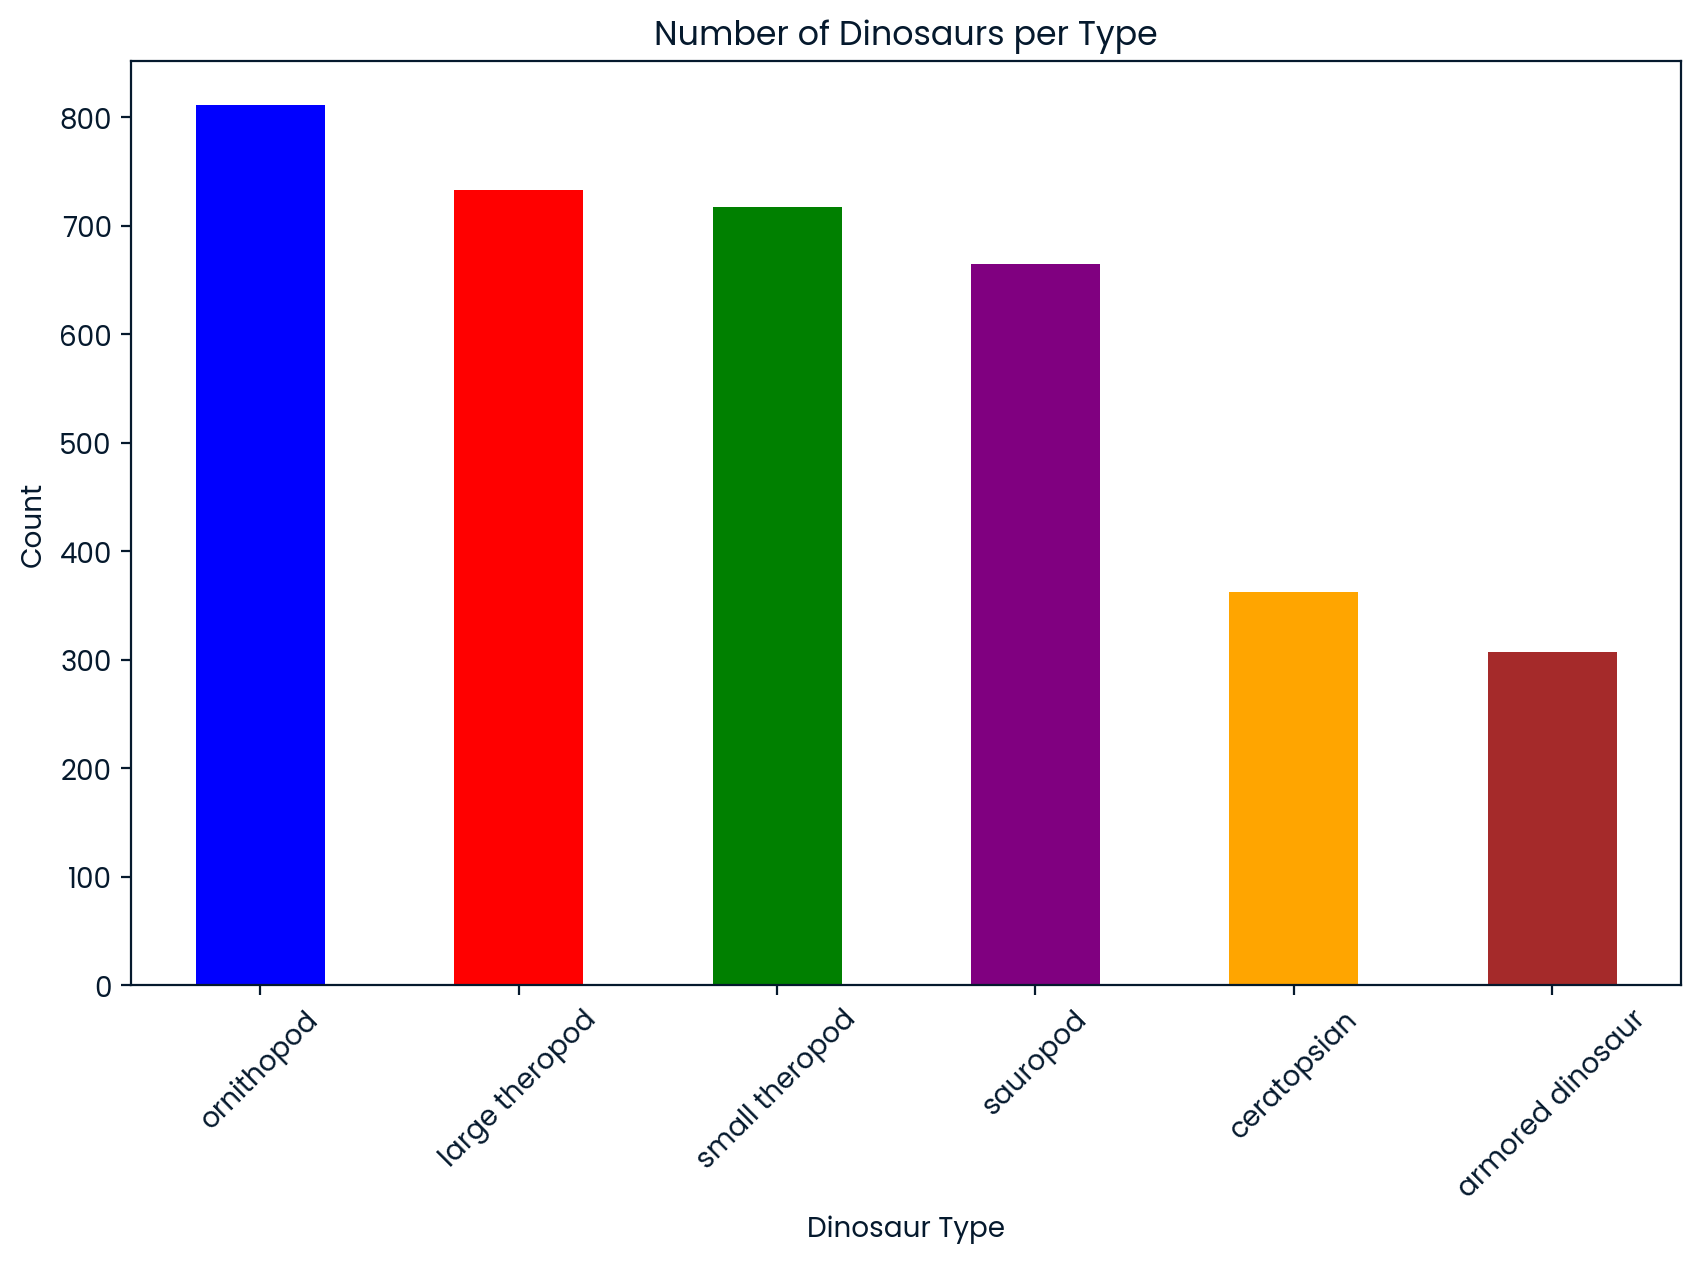

In [11]:
dinosaur_type_counts = dinosaurs['type'].value_counts()

import matplotlib.pyplot as plt

colors = {
    'ornithopod': 'blue',
    'large theropod': 'red',
    'small theropod': 'green',
    'sauropod': 'purple',
    'ceratopsian': 'orange',
    'armored dinosaur': 'brown'
}

plt.figure(figsize=(10, 6))
dinosaur_type_counts.plot(kind='bar', color=[colors.get(x, 'black') for x in dinosaur_type_counts.index])
plt.title('Number of Dinosaurs per Type')
plt.xlabel('Dinosaur Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Ornithopods are the most frequently recorded dinosaur type, followed by large theropods and small theropods. Armored dinosaurs are the least common. This distribution might reflect either the relative abundance of these types during the periods they lived or the likelihood of their fossilization.

### **❔Did dinosaurs get bigger over time?**

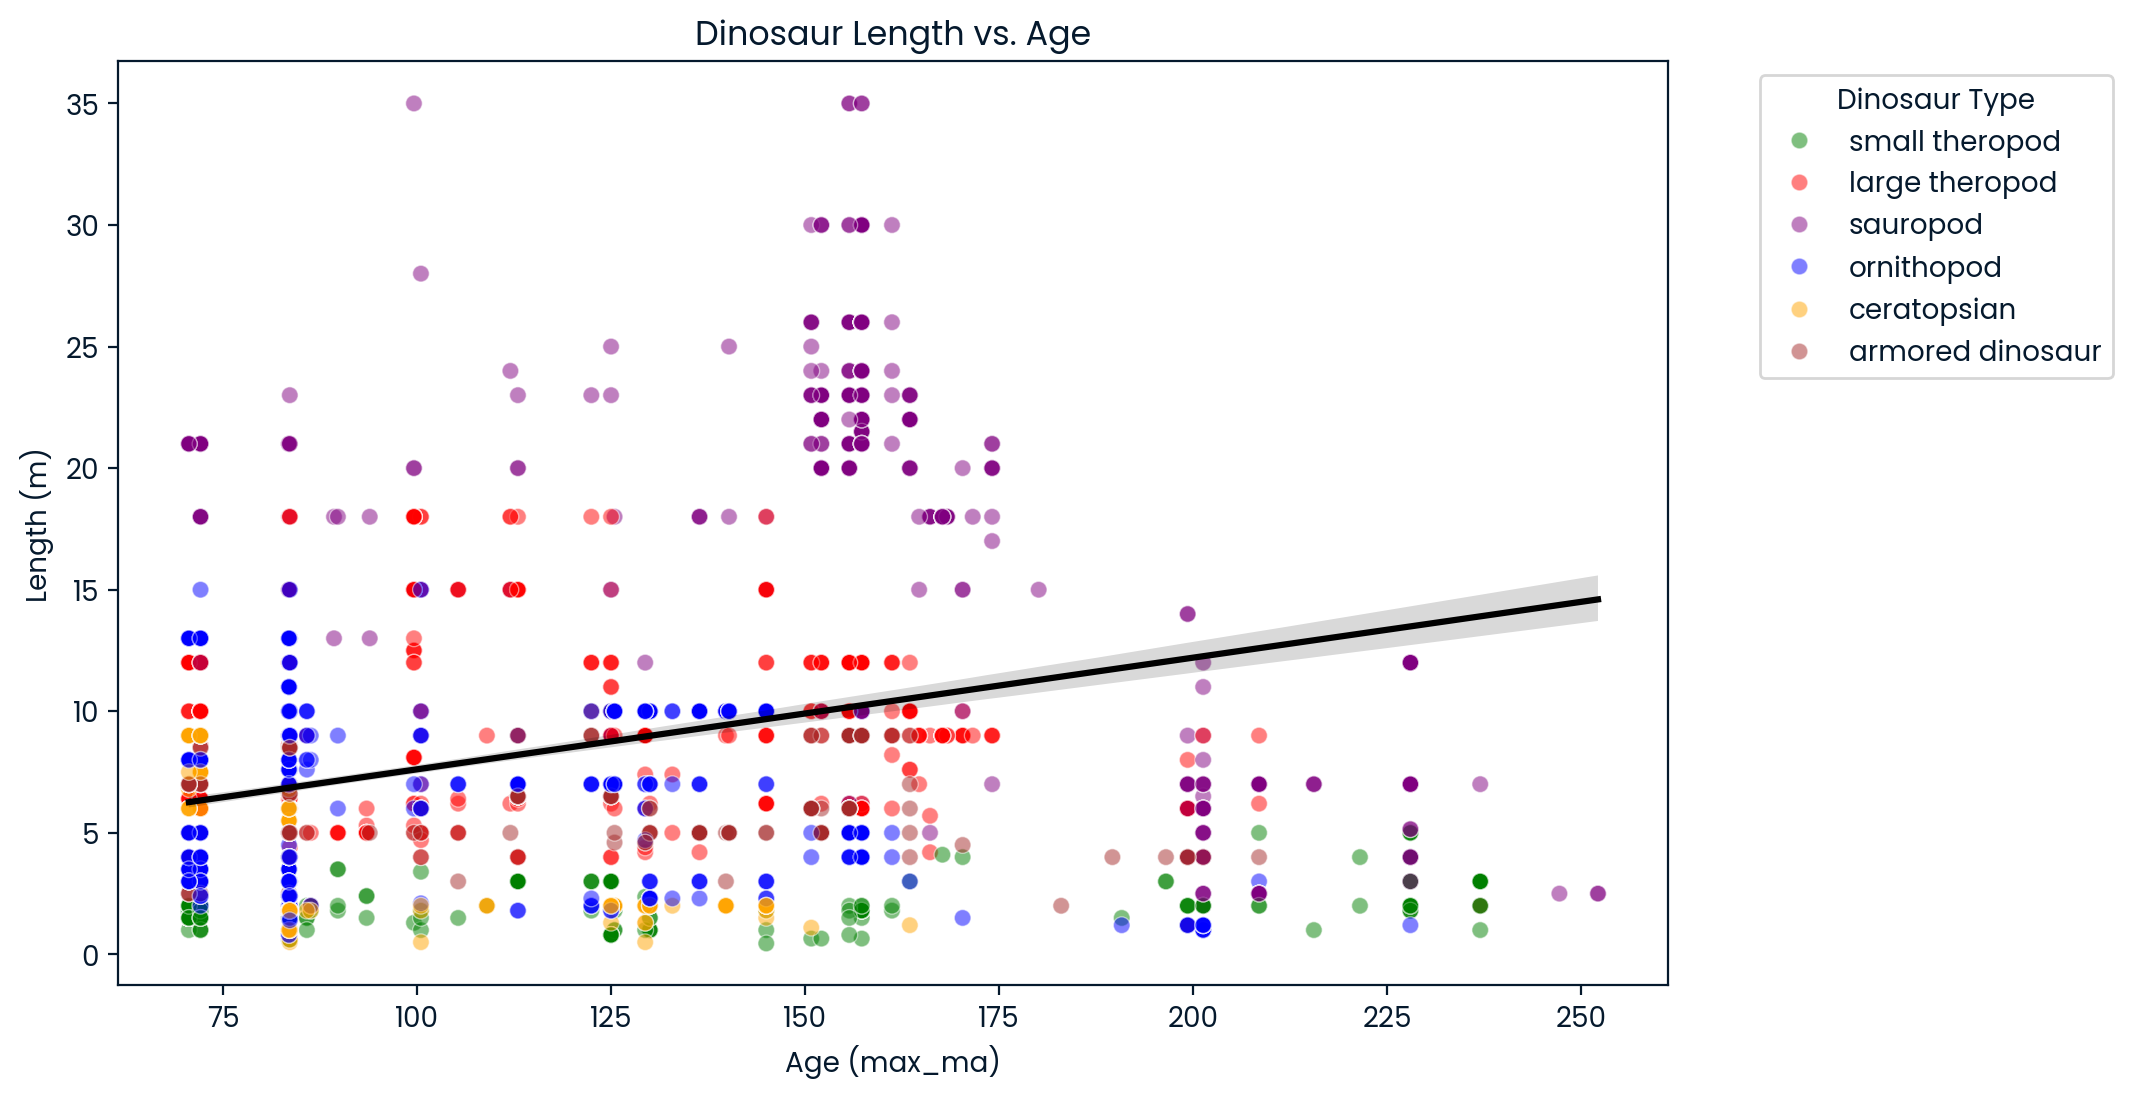

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = {
    'ornithopod': 'blue',
    'large theropod': 'red',
    'small theropod': 'green',
    'sauropod': 'purple',
    'ceratopsian': 'orange',
    'armored dinosaur': 'brown'
}

# Creating a color column in the dataframe based on the dinosaur type
dinosaurs['color'] = dinosaurs['type'].map(colors)

plt.figure(figsize=(10, 6))
# Use the color column for coloring the points
sns.scatterplot(x='max_ma', y='length_m', hue='type', palette=colors, data=dinosaurs, alpha=0.5)
sns.regplot(x='max_ma', y='length_m', data=dinosaurs, scatter=False, color='black')  # Regression line
plt.title('Dinosaur Length vs. Age')
plt.xlabel('Age (max_ma)')
plt.ylabel('Length (m)')
plt.legend(title='Dinosaur Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The scatter plot and regression line suggest a slight increase in dinosaur size over time. However, the wide scatter indicates considerable variability, implying that other factors likely influenced dinosaur size as well.

### **📌 Interactive Map**

In [13]:
import folium
from folium.plugins import MarkerCluster

# base map centered at an approximate global location
map = folium.Map(location=[20, 0], zoom_start=2)

marker_cluster = MarkerCluster().add_to(map)

colors = {
    'ornithopod': 'blue',
    'large theropod': 'red',
    'small theropod': 'green',
    'sauropod': 'purple',
    'ceratopsian': 'orange',
    'armored dinosaur': 'brown'
}

# Adding points to the map for each dinosaur record
for idx, row in dinosaurs.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=(
            f"<b>Name:</b> {row['name']}<br>"
            f"<b>Type:</b> {row['type']}<br>"
            f"<b>Length:</b> {row['length_m']}m<br>"
            f"<b>Diet:</b> {row['diet']}<br>"
            f"<b>Region:</b> {row['region']}<br>"
            f"<b>Age:</b> {row['max_ma']} - {row['min_ma']} million years ago"
        ),
        icon=folium.Icon(color=colors.get(row['type'], 'blue')),
        tooltip=row['name']
    ).add_to(marker_cluster)

folium.LayerControl().add_to(map)
map

The interactive map above shows where dinosaur fossils have been found around the world. Different colors represent different types of dinosaurs, and clusters help visualize regions with high fossil discovery rates. This geographic visualization helps in understanding the spread and diversity of dinosaurs globally.

# 

# 2️⃣ Part 2 (SQL) - Understanding movie data 🎥 

## 📖 Background
You have just been hired by a large movie studio to perform data analysis. Your manager, an executive at the company, wants to make new movies that "recapture the magic of old Hollywood." So you've decided to look at the most successful films that came out before Titanic in 1997 to identify patterns and help generate ideas that could turn into future successful films.

## 💾 The data

You have access to the following table, _**cinema.films**_:

| Column name | Description |
|---|---|
| id | Unique movie identifier. |
| title | The title of the movie. |
| release_year | The year the movie was released to the public. |
| country | The country in which the movie was released. |
| duration | The runtime of the movie, in minutes. |
| language | The original language the movie was produced in. |
| certification | The [rating](https://simple.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system) the movie was given based on their suitability for audiences. |
| gross | The revenue the movie generated at the box office, in USD. |
| budget | The available budget the production had for producing the movie, in USD. |

You can click the "Browse tables" button in the upper right-hand corner of the SQL cell below to view the available tables. They will show on the left of the notebook.

The data was sourced from [IMDb](https://www.imdb.com/).

## 💪 Objectives

The aim is to determine the number of movies, handle missing data, analyze certifications, identify top movie-producing countries, and compare average durations of English and French movies. Specifically, the following questions must be answered:

- How many movies are present in the database?
- How many rows have missing data in the gross and budget columns, and what should be done with these rows?
- How many different certifications or ratings are present in the database?
- What are the top five countries in terms of the number of movies produced?
- What is the average duration of English versus French movies?
- Are there any additional insights that can be gleaned from the analysis?

## 🔑 Summary of Findings

- There are 4968 movies in the database.
- There are 810 rows with missing gross data and 430 rows with missing budget data; these rows could be imputed with median values or excluded from specific analyses.
- There are 13 different certifications or ratings.
- The top five countries are USA (3750), UK (443), France (163), Canada (123), and Germany (97).
- The average duration is 107.64 minutes for English movies and 104.67 minutes for French movies.

In [16]:
SELECT * 
FROM cinema.films
LIMIT 10

id                                             title  ...      gross     budget
0   1  Intolerance: Love's Struggle Throughout the Ages  ...        NaN   385907.0
1   2                    Over the Hill to the Poorhouse  ...  3000000.0   100000.0
2   3                                    The Big Parade  ...        NaN   245000.0
3   4                                        Metropolis  ...    26435.0  6000000.0
4   5                                     Pandora's Box  ...     9950.0        NaN
5   6                               The Broadway Melody  ...  2808000.0   379000.0
6   7                                     Hell's Angels  ...        NaN  3950000.0
7   8                                A Farewell to Arms  ...        NaN   800000.0
8   9                                       42nd Street  ...  2300000.0   439000.0
9  10                                She Done Him Wrong  ...        NaN   200000.0

[10 rows x 9 columns]

### ❔How many movies are present in the database?

In [37]:
SELECT COUNT(*) AS num_movies
FROM cinema.films;

num_movies
0        4968

There are 4968 movies in the database.

In [2]:
SELECT release_year, COUNT(*) AS num_movies
FROM cinema.films
GROUP BY release_year
ORDER BY release_year;

release_year  num_movies
0         1916.0           1
1         1920.0           1
2         1925.0           1
3         1927.0           1
4         1929.0           2
..           ...         ...
87        2013.0         236
88        2014.0         252
89        2015.0         226
90        2016.0         106
91           NaN          42

[92 rows x 2 columns]

The results indicate a steady production of movies each year, with the highest number of movies released in 2009, totaling 260 films.

Analyzing the distribution of movies released each year could reveal trends in movie production over time, helping to identify peak periods of creativity and innovation in the film industry.

### ❔There seems to be a lot of missing data in the gross and budget columns. How many rows have missing data? What would you recommend your manager to do with these rows?

In [30]:
SELECT 
    COUNT(*) AS missing_gross 
FROM cinema.films 
WHERE gross IS NULL;

missing_gross
0            810

In [31]:
SELECT 
    COUNT(*) AS missing_budget 
FROM cinema.films 
WHERE budget IS NULL;

missing_budget
0             430

The significant amount of missing data in the gross column and a moderate amount in the budget column suggests potential gaps in revenue data reporting. For handling these missing values, imputation with median or mean values is recommended, or the rows could be excluded from specific analyses to avoid skewed results.

### ❔How many different certifications or ratings are present in the database?

In [38]:
SELECT COUNT(DISTINCT certification) AS num_certifications
FROM cinema.films;

num_certifications
0                  13

The variety of certifications indicates a wide range of content aimed at different audience groups. Understanding how these certifications impact a movie's success could help in making strategic decisions about the target audience and content suitability for future films.

### ❔What are the top five countries in terms of number of movies produced?

In [33]:
SELECT country, COUNT(*) AS num_movies
FROM cinema.films
GROUP BY country
ORDER BY num_movies DESC
LIMIT 5;

country  num_movies
0      USA        3750
1       UK         443
2   France         153
3   Canada         123
4  Germany          97

The USA dominates movie production, reflecting its central role in the global film industry. The presence of European countries and Canada also highlights significant contributions from these regions. The dominance of English language films indicates a broad appeal, but the presence of films from other languages and countries suggests potential markets and cultural influences worth exploring.

### ❔What is the average duration of English versus French movies?

In [34]:
SELECT 
    language, 
    AVG(duration) AS avg_duration 
FROM cinema.films 
WHERE language IN ('English', 'French') 
GROUP BY language;

language  avg_duration
0   French    104.666667
1  English    107.636541

The close average durations suggest that both English and French films adhere to similar norms in storytelling length. This insight can guide producers in maintaining a consistent movie length that appeals to international audiences.